<a href="https://colab.research.google.com/github/HiteshAdari/Moivelens_colab_filtering/blob/main/MOVIELENS_colabFiltering_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==1.0.50 --quiet
!pip install pandas-profiling --quiet
import pandas as pd
from fastai.collab import CollabDataBunch, collab_learner


     |████████████████████████████████| 210 kB 10.8 MB/s 
     |████████████████████████████████| 355 kB 63.5 MB/s 
     |████████████████████████████████| 78 kB 5.3 MB/s 


In [ ]:
!rm -rf ml-100k ml-100k.zip
!wget -q http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -q ml-100k.zip
!ls ml-100k

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [ ]:
cols = ['User ID','Movie ID','Rating','Timestamp']
ratings_df = pd.read_csv('ml-100k/u.data', delimiter='\t', 
                         header=None, names=cols)
ratings_df.sample(5)

,User ID,Movie ID,Rating,Timestamp
41491,268,1303,1,875744228
86829,398,478,5,875657857
17536,207,205,4,875991160
90042,213,924,4,878870846
67979,435,527,4,884130995


In [ ]:
data = CollabDataBunch.from_df(ratings_df, valid_pct=0.1)
data.show_batch()

User ID,Movie ID,target
393,1092,3.0
457,405,5.0
256,356,3.0
214,23,5.0
919,257,4.0


In [ ]:
learn = collab_learner(data, n_factors=40, y_range=[0,5.5], wd=.1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


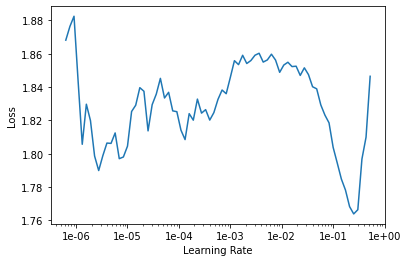

In [ ]:
#Training
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [ ]:
# Predictions
(users, items), ratings = next(iter(data.valid_dl))
preds = learn.model(users, items)
print('Real\tPred\tDifference')
for p in list(zip(ratings, preds))[:16]:
    print('{}\t{:.1f}\t{:.1f}'.format(p[0],p[1],p[1]-p[0]))

Real	Pred	Difference
5.0	2.8	-2.2
4.0	2.7	-1.3
2.0	2.7	0.7
3.0	2.7	-0.3
5.0	2.8	-2.2
3.0	2.7	-0.3
3.0	2.7	-0.3
3.0	2.7	-0.3
4.0	2.7	-1.3
4.0	2.7	-1.3
1.0	2.8	1.8
2.0	2.7	0.7
5.0	2.7	-2.3
4.0	2.7	-1.3
3.0	2.8	-0.2
3.0	2.7	-0.3
